In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np

import cv2

from mpl_toolkits import mplot3d
rng = np.random.RandomState(42)

import math

import pandas as pd



In [0]:
#config of generated data

MAX_RADIUS = 100
MIN_RADIUS = 5
MAX_Y = 50
NOISE_RATIO= 0.05

In [0]:
def toEuler(x,y,z,angle):
  s=math.sin(angle)
  c=math.cos(angle)
  t=1-c
  if ((x*y*t + z*s) > 0.998):
    # north pole singularity detected
    heading = 2*math.atan2(x*math.sin(angle/2),math.cos(angle/2))
    attitude = math.pi/2
    bank = 0
    return [bank, heading, attitude]

  if ((x*y*t + z*s) < -0.998):
  # south pole singularity detected
    heading = -2*math.atan2(x*math.sin(angle/2),math.cos(angle/2));
    attitude = -math.pi/2;
    bank = 0;
    return [bank, heading, attitude]

  heading = math.atan2(y * s- x * z * t , 1 - (y*y+ z*z ) * t)
  attitude = math.asin(x * y * t + z * s) 
  bank = math.atan2(x * s - y * z * t , 1 - (x*x + z*z) * t)
  return [bank, heading, attitude]


def look_at(sourcePoint, destPoint):
  diff = destPoint - sourcePoint
  veclen = np.sqrt(diff.dot(diff))
  forwardVector = diff / veclen;
  v3_forward = np.array([0, 0, 1])
    # dot = Vector3.Dot(Vector3.forward, forwardVector);
  dot = v3_forward.dot(forwardVector)


    # // test for dot -1
    # if(nearly_equal_eps_f(dot, -1.0f, 0.000001f))
    # {
    #     // vector a and b point exactly in the opposite direction, 
    #     // so it is a 180 degrees turn around the up-axis
    #     return quaternion(up, gdeg2rad(180.0f));
    # }
  # se for o contrário
  if abs(dot - (-1.0)) < 0.000001:
    return [0, math.pi, 0]
  
  if abs(dot - (1.0)) < 0.000001:
    return [0, 0, 0]

  rot_angle = math.acos(dot)
  rot_axis = np.cross(v3_forward, forwardVector)
  rot_axis_len = np.sqrt(rot_axis.dot(rot_axis))
  rot_axis = rot_axis / rot_axis_len

  return toEuler(rot_axis[0], rot_axis[1], rot_axis[2], rot_angle)
# print(look_at(np.array([10, 0, 0]), np.array([0, 0, 0])))
# print(look_at(np.array([0, 10, 0]), np.array([0, 0, 0])))
# print(look_at(np.array([10, 10, 0]), np.array([0, 0, 0])))

In [0]:

def accepted(x,y,z):
  # print(x,y,z)
  valid_height = (y > -MAX_Y) and (y < MAX_Y)
  in_front = z < 0
  inside_circle = (x * x + z * z) < (2*MAX_RADIUS*MAX_RADIUS)
  outside_circle = (x * x + z * z) > (2*MIN_RADIUS*MIN_RADIUS)
  return inside_circle and outside_circle and in_front and valid_height and (abs(x) < abs(z)) and (abs(y) < abs(z))

def __rand():
  return (rng.rand() -0.5)* 2

def disturb_r():
  return  __rand() * (3.14/24)

def disturb_t():
  return  __rand() * 20

def get_point():

  x = __rand() * MAX_RADIUS
  y = __rand() * MAX_Y
  z = rng.rand() * -MAX_RADIUS # cam coords opencv
  
  looking_at = look_at(
      np.array([x,y,z]),
      np.array([0,0,0]),
  )

  rx = (looking_at[0] + disturb_r()) % (math.pi*2)
  ry = (looking_at[1] + disturb_r()) % (math.pi*2)
  rz = (looking_at[2] + disturb_r()) % (math.pi*2)
  tx = x + disturb_t()
  ty = y + disturb_t()
  tz = z + disturb_t()
  if accepted(tx,ty,tz):
    return [rx, ry, rz, tx, ty, tz]
  else:
    return get_point()


def get_points(n):
  temp = []

  for _ in range(n):
    temp.append(get_point())
  
  return np.array(temp)

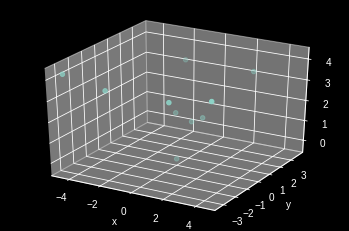

In [435]:
points = [
    #nose tips
    0.0,
    -1 * 0.003874,
    -1 * 0.290468,

    # bottom nose
    0.0,
    -1 * -1.26207,
    -1 * -1.14108,

    # left nostril
    -0.85877,
    -1 * -1.05017,
    -1 * -1.53035,

    # right nostril
    0.85877,
    -1 * -1.05017,
    -1 * -1.53035,

    #chin
    # 0.0,g
    # -8.01629,
    # -3.32839,

    #lefteyeleftcorner
    -4.49893,
    -1 * 3.21601,
    -1 * -4.22082,

    #lefteyerightcorner
    -1.9326,
    -1 * 3.14086,
    -1 * -3.78216,

    #righteyerightcorner
    4.49893,
    -1 * 3.21601,
    -1 * -4.22082,

    #righteyeleftcorner
    1.9326,
    -1 * 3.14086,
    -1 * -3.78216,

    # left mouth corner
    -2.17298,
    -1 * -3.62696,
    -1 * -3.15651,
    #rightmouthcorner
    2.17298,
    -1 * -3.62696,
    -1 * -3.15651,
]
arr_1d = np.array(points)
arr_3d = arr_1d.reshape((10, 3))

ax = plt.axes(projection='3d')
ax.scatter3D(arr_3d[:,0], arr_3d[:,1], arr_3d[:,2]);
plt.xlabel('x')
plt.ylabel('y')
plt.show()


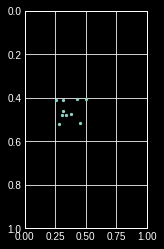

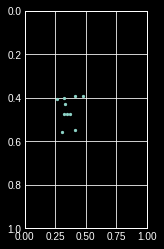

In [436]:
# Calculates Rotation Matrix given euler angles.
def eulerAnglesToRotationMatrix(theta) :
     
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])
         
         
                     
    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R
def matrix_to_rvec_tvec(matrix):

  tvec = np.array([matrix[0][3], matrix[1][3], matrix[2][3]])
  new_rotmat = np.array([
                   [matrix[0][0], matrix[0][1], matrix[0][2]],
                   [matrix[1][0], matrix[1][1], matrix[1][2]],
                   [matrix[2][0], matrix[2][1], matrix[2][2]]
  ])
  rvec = cv2.Rodrigues(new_rotmat)[0]
  return (rvec, tvec)

def rotmat_tvec_to_matrix(rm, tvec):
  matrix = np.array([
    [rm[0][0], rm[0][1], rm[0][2], tvec[0] ],
    [rm[1][0], rm[1][1], rm[1][2], tvec[1] ],
    [rm[2][0], rm[2][1], rm[2][2], tvec[2] ],
    [0       , 0       , 0       , 1       ],
  ])

  return matrix

def world_space_to_cam_space(rvec, tvec):
  rm = cv2.Rodrigues(rvec)[0]

  world_space = rotmat_tvec_to_matrix(rm, tvec)

  cam_space = np.linalg.inv(world_space)

  return matrix_to_rvec_tvec(cam_space)

def gen_vecs(rx,ry,rz,tx,ty,tz):
  rm = eulerAnglesToRotationMatrix([rx, ry, rz])
  cam_space = rotmat_tvec_to_matrix(rm, [tx, ty, tz])
  world_space = np.linalg.inv(cam_space)
  return matrix_to_rvec_tvec(world_space)


def print_20points_image(points):
  fig1, ax1 = plt.subplots()
  plt.scatter(points[:,0], points[:,1], cmap='Pastel1', s=5)
  ax1.set_aspect(16/9)
  plt.gca().invert_yaxis()
  plt.ylim([1,0])
  plt.xlim([0,1])
  plt.show()


def project_Rod(rvec, tvec):
  camera_matrix = np.array([
    [1.0     ,0.0      ,0.5  ],
    [0.0     ,1.0      ,0.5  ],
    [0.0     ,0.0      ,1.0  ]
  ])
  dist_coefs = np.zeros((3,3))
  
  image_points, jac = cv2.projectPoints(arr_3d, rvec, tvec, camera_matrix, None)
  return image_points.reshape(-1,2)
  
def project(rx,ry,rz,tx,ty,tz):
  (rvec, tvec) = gen_vecs(rx,ry,rz,tx,ty,tz)
  return project_Rod(rvec, tvec)

# sample observations
print_20points_image(np.array([
  [0.31421235563381766, 0.4607317451153278],
  [0.33455447755135476, 0.481124631450009],
  [0.3049228445656583, 0.47741346086927555],
  [0.3812701187247918, 0.4750373162142726],
  [0.2536635380105084, 0.4092010241336816],
  [0.3140815073413602, 0.40791436555554933],
  [0.5009391706943875, 0.4041928480473882],
  [0.4244090065072146, 0.4045880915988722],
  [0.2814735702125259, 0.5200298591356486],
  [0.4515303653283811, 0.5137881205461806],
]))
_rv = np.array([
  -0.32400916493626547,
  0.1542356768006612,
  -0.0303231733654137
])
_tv = np.array([
  -6.017233247055279,
  -2.4314311567760027,
  36.45508530651529
])
# what solvePnP will give back
print_20points_image(project_Rod(_rv,_tv))
cam_space = (world_space_to_cam_space(_rv,_tv))
# world_space = 

# "outvec": [
#   11.136218366850775,
#   13.976331464428519,
#   -32.43052570352748
# ],
# "outrvec": [
#   0.32400916493626547,
#   -0.15423567680066114,
#   0.0303231733654137
# ]



# tx = -50
# ty = -50
# tz = 5

# looking_at = look_at(
#     np.array([tx,ty,tz]),
#     np.array([0,0,0]),
# )
# rx = looking_at[0]
# ry = looking_at[1]
# rz = looking_at[2]
# print(looking_at)
# data = project(rx, ry, rz, tx, ty, tz)
# plt.scatter(data[:,0], data[:,1], alpha=0.3, cmap='viridis')
# plt.gca().invert_yaxis()
# plt.show()

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(data[:,0], data[:,1], data[:,2], cmap='viridis');
# plt.show()


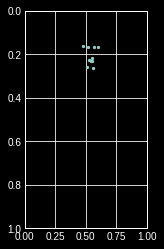

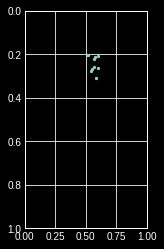

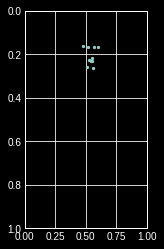

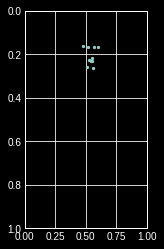

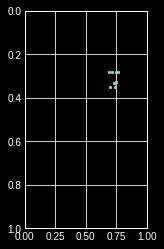

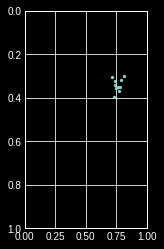

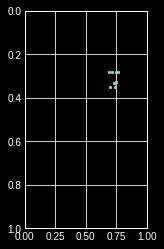

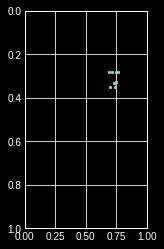

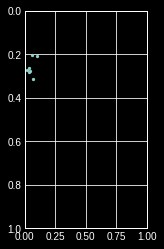

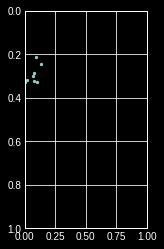

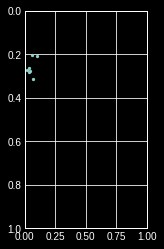

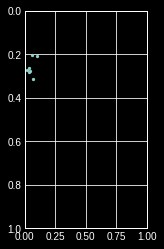

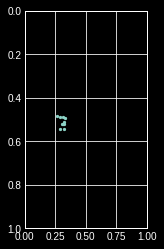

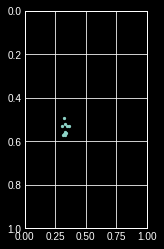

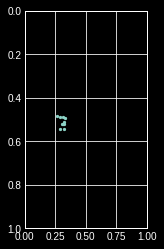

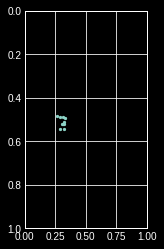

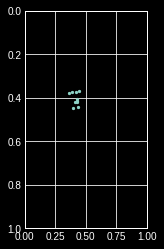

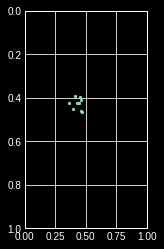

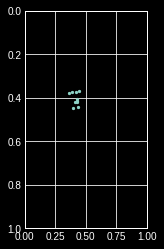

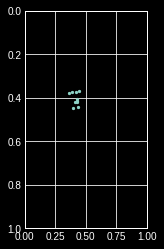

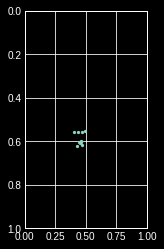

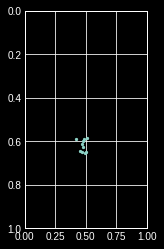

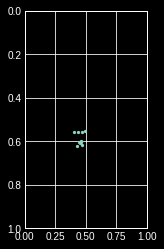

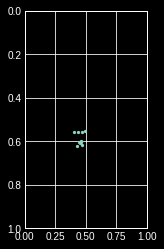

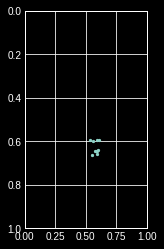

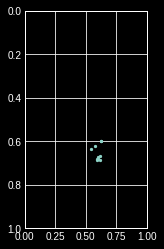

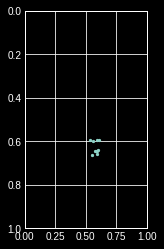

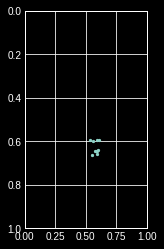

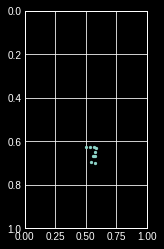

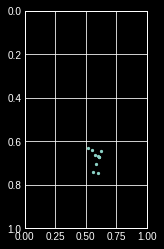

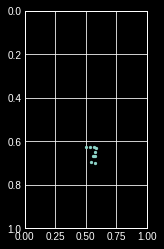

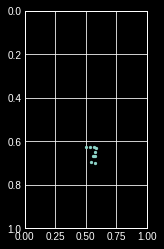

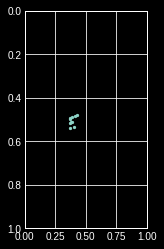

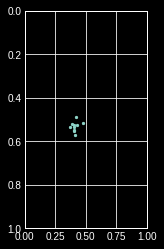

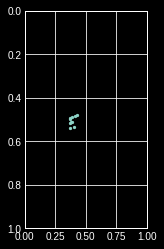

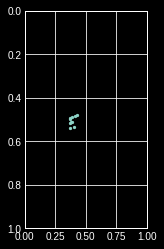

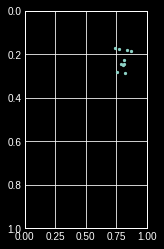

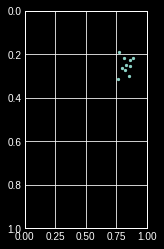

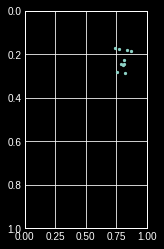

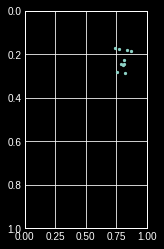

In [437]:
def get_projections(x, n):
  temp = []
  for i in range(n):
    pj = project(x[i][0],x[i][1],x[i][2],x[i][3],x[i][4],x[i][5],)
    temp.append(pj)
  
  return np.array(temp)

def prepare_outputs(x,n):
  temp = []
  for i in range(n):
    (rvec, tvec) = gen_vecs(x[i][0],x[i][1],x[i][2],x[i][3],x[i][4],x[i][5],)
    temp.append(
        [rvec[0][0], rvec[1][0], rvec[2][0], tvec[0], tvec[1], tvec[2],]
    )
  
  return np.array(temp)
def project_expected(item):
  print_20points_image(project_Rod(np.array([item[0],item[1],item[2]]),np.array([item[3],item[4],item[5]])))


def normalize_sym_item(item, factor):
  
  ret = (item / factor / 2) + 0.5
  # print(f'item {item} factor {factor } ret {ret}')
  return ret

def denormalize_sym_item(item, factor):
  ret = (item - 0.5) * 2 * factor
  # ret = (item / factor / 2) + 0.5
  
  return ret

def denormalize_output(output):
  # -1.8 -- 1.8
  rx = denormalize_sym_item(output[0], 1.8)
  # -3.5 -- 3.5
  ry = denormalize_sym_item(output[1], 3.5)
  # -3.5 -- 3.5
  rz = denormalize_sym_item(output[2], 3.5)

  tx = denormalize_sym_item(output[3], MAX_RADIUS * 1.5)

  ty = denormalize_sym_item(output[4], MAX_Y * 1.5)

  tz = output[5] * (MAX_RADIUS  * 1.5)

  return np.array([
                   rx,ry,rz,tx,ty,tz
  ])

def normalize_output(output):
  
  # -1.8 -- 1.8
  rx = normalize_sym_item(output[0], 1.8)
  # -3.5 -- 3.5
  ry = normalize_sym_item(output[1], 3.5)
  # -3.5 -- 3.5
  rz = normalize_sym_item(output[2], 3.5)

  tx = normalize_sym_item(output[3], MAX_RADIUS * 1.5)

  ty = normalize_sym_item(output[4], MAX_Y * 1.5)

  tz = output[5] / (MAX_RADIUS  * 1.5)

  return np.array([
                   rx,ry,rz,tx,ty,tz
  ])

def add_noise(pjs, n):
  # input [n, 10, 2]

  noise = rng.rand(n, 10, 2) * NOISE_RATIO
  return pjs + noise

def get_data(n, debug = False):
  some_points = get_points(n)
  some_projections = get_projections(some_points, n) # inputs
  noised_projections = add_noise(some_projections, n) # inputs with noise
  some_vecs = prepare_outputs(some_points, n) # outputs
  if debug:
    for i in range(10):
      print_20points_image(some_projections[i])
      
      print_20points_image(noised_projections[i]) 

      project_expected(some_vecs[i])

      project_expected(
          denormalize_output(
              normalize_output(some_vecs[i])
          )
      )
  
  # validar as projeções pra q nenhuma passe de [0, 1]
  # validar os outputs pra q eles nao passem dos máximos pra poder normalizar em paz
  xs = []
  ys = []

  for i in range(n):
    if np.max(noised_projections[i]) < 1 and np.min(noised_projections[i]) > 0:
      normalized = normalize_output(some_vecs[i])
      if np.max(normalized) < 1 and np.min(normalized) > 0:
        xs.append(noised_projections[i])
        ys.append(normalized)
    
  return (np.array(xs), np.array(ys))


(xs, ys) = get_data(100, debug=True)



In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
n_train = 500*1000
v_split = 0.2
(xs, ys) = get_data(n_train)
n_test = int(n_train * v_split)
(xs2, ys2) = get_data(n_test)

In [0]:
def print_debug_image():
  test_proj = np.array([
    [0.31421235563381766, 0.4607317451153278],
    [0.33455447755135476, 0.481124631450009],
    [0.3049228445656583, 0.47741346086927555],
    [0.3812701187247918, 0.4750373162142726],
    [0.2536635380105084, 0.4092010241336816],
    [0.3140815073413602, 0.40791436555554933],
    [0.5009391706943875, 0.4041928480473882],
    [0.4244090065072146, 0.4045880915988722],
    [0.2814735702125259, 0.5200298591356486],
    [0.4515303653283811, 0.5137881205461806],
  ])
  print("what was ginven")
  print_20points_image(test_proj)
  res = model(np.array([test_proj]))[0]
  print("what nn gives")
  project_expected(denormalize_output(res))
  _rv = np.array([
    -0.32400916493626547,
    0.1542356768006612,
    -0.0303231733654137
  ])
  _tv = np.array([
    -6.017233247055279,
    -2.4314311567760027,
    36.45508530651529
  ])
  # what solvePnP will give back
  print("what solve pnp gives")
  print_20points_image(project_Rod(_rv,_tv))

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  # plt.ylim([0,mae: 0.0436])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  # plt.ylim([0,0.0038])
  plt.legend()
  plt.show()


In [0]:
# tf.keras.backend.set_floatx('float64')
tf.keras.backend.set_floatx('float64')
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(10, 2)),
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(6)
# ])
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(10, 2)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(6)
])
# optimizer = tf.keras.optimizers.RMSprop(0.00001)
optimizer = tf.keras.optimizers.RMSprop(0.0001)


model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])
  
#256 -> 128, dropout de 0.2 depois de cada
# model.compile(optimizer='adam',
#               loss='mean_squared_error') // 50k, treina 250 epoch em cada 50k

iteração 0
Train on 374014 samples, validate on 93504 samples
374014/374014 - 39s - loss: 0.0019 - mae: 0.0291 - mse: 0.0019 - val_loss: 0.0015 - val_mae: 0.0245 - val_mse: 0.0015
what was ginven


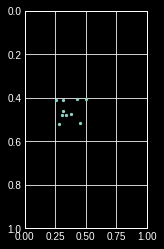

what nn gives


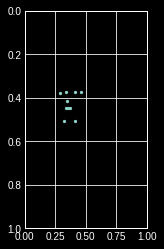

what solve pnp gives


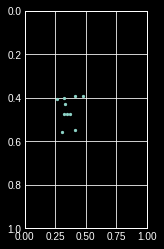

iteração 1
Train on 374014 samples, validate on 93504 samples
374014/374014 - 39s - loss: 0.0019 - mae: 0.0290 - mse: 0.0019 - val_loss: 0.0015 - val_mae: 0.0244 - val_mse: 0.0015
what was ginven


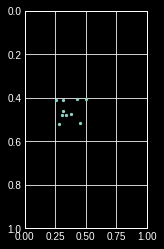

what nn gives


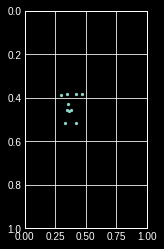

what solve pnp gives


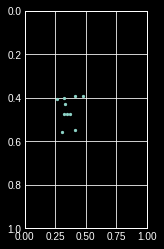

iteração 2
Train on 374014 samples, validate on 93504 samples
374014/374014 - 39s - loss: 0.0019 - mae: 0.0289 - mse: 0.0019 - val_loss: 0.0015 - val_mae: 0.0245 - val_mse: 0.0015
what was ginven


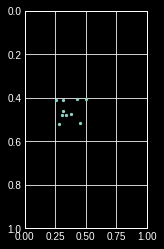

what nn gives


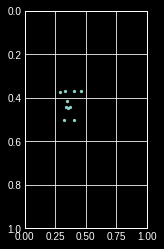

what solve pnp gives


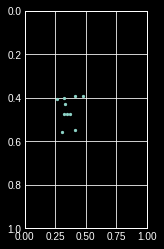

iteração 3
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0289 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0244 - val_mse: 0.0015
what was ginven


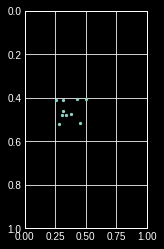

what nn gives


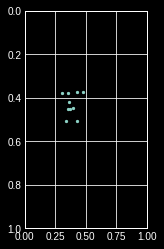

what solve pnp gives


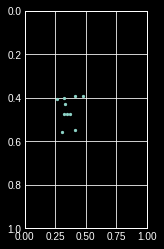

iteração 4
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0288 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0242 - val_mse: 0.0015
what was ginven


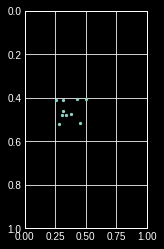

what nn gives


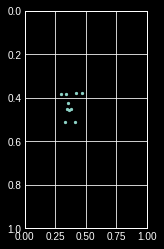

what solve pnp gives


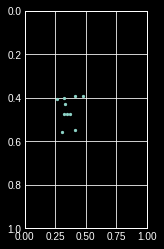

iteração 5
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0288 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0243 - val_mse: 0.0015
what was ginven


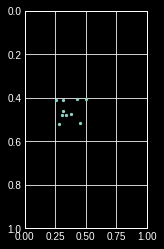

what nn gives


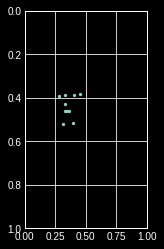

what solve pnp gives


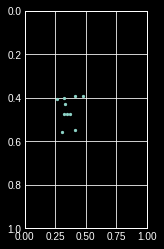

iteração 6
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0288 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0244 - val_mse: 0.0015
what was ginven


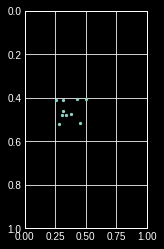

what nn gives


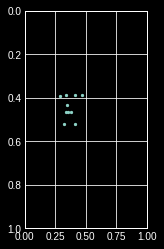

what solve pnp gives


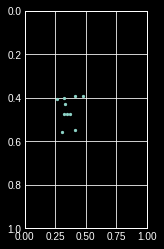

iteração 7
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0287 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0243 - val_mse: 0.0015
what was ginven


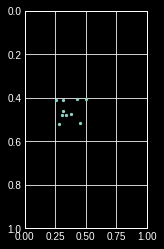

what nn gives


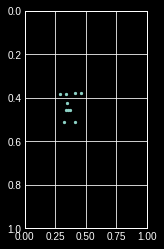

what solve pnp gives


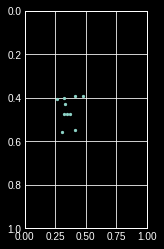

iteração 8
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0287 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0243 - val_mse: 0.0015
what was ginven


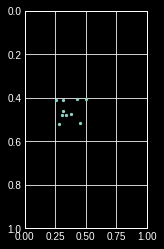

what nn gives


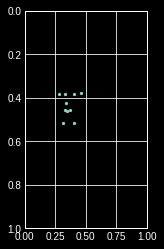

what solve pnp gives


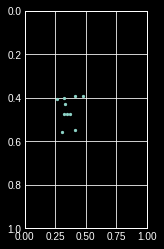

iteração 9
Train on 374014 samples, validate on 93504 samples
374014/374014 - 39s - loss: 0.0018 - mae: 0.0286 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0244 - val_mse: 0.0015
what was ginven


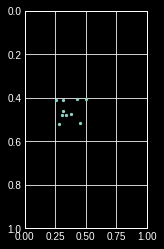

what nn gives


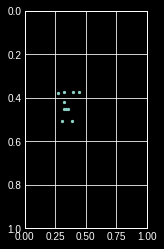

what solve pnp gives


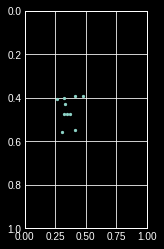

iteração 10
Train on 374014 samples, validate on 93504 samples
374014/374014 - 40s - loss: 0.0018 - mae: 0.0286 - mse: 0.0018 - val_loss: 0.0014 - val_mae: 0.0242 - val_mse: 0.0014
what was ginven


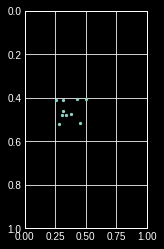

what nn gives


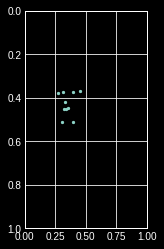

what solve pnp gives


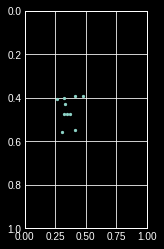

iteração 11
Train on 374014 samples, validate on 93504 samples
374014/374014 - 41s - loss: 0.0018 - mae: 0.0286 - mse: 0.0018 - val_loss: 0.0014 - val_mae: 0.0242 - val_mse: 0.0014
what was ginven


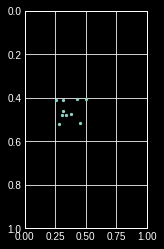

what nn gives


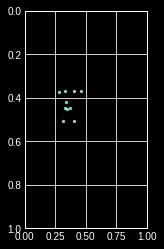

what solve pnp gives


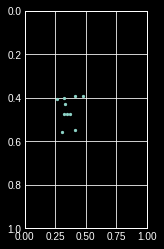

iteração 12
Train on 374014 samples, validate on 93504 samples
374014/374014 - 41s - loss: 0.0018 - mae: 0.0286 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0244 - val_mse: 0.0015
what was ginven


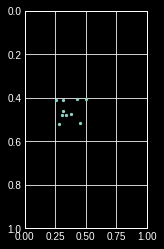

what nn gives


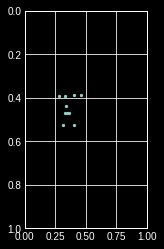

what solve pnp gives


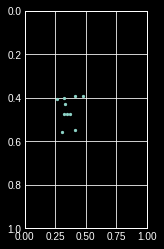

iteração 13
Train on 374014 samples, validate on 93504 samples


In [0]:
#128->64 travou em 0.4 com rms 0.0001 - treinar com rms menor e ver se estabiliza bem
#64->32 travou em 0.4 com rms 0.001
for i in range(15):
  print(f'iteração {i}')
  training_history = model.fit(
      xs,
      ys,
      epochs=1,
      validation_split = v_split,
      verbose = 2
  )
  # print('\nhistory dict:', training_history.history)
  # plot_history(training_history)
  # model.evaluate(xs2,  ys2, verbose=2)
  print_debug_image()



In [0]:
# create on Colab directory
model.save('model.h5')    
model.save_weights('model_weights.h5')